In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("Mall_Customers.csv")
df.head()

CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40

In [3]:
df.shape

(200, 5)

### Univariate Analysis

In [4]:
df.describe()

CustomerID         Age  Annual Income (k$)  Spending Score (1-100)
count  200.000000  200.000000          200.000000              200.000000
mean   100.500000   38.850000           60.560000               50.200000
std     57.879185   13.969007           26.264721               25.823522
min      1.000000   18.000000           15.000000                1.000000
25%     50.750000   28.750000           41.500000               34.750000
50%    100.500000   36.000000           61.500000               50.000000
75%    150.250000   49.000000           78.000000               73.000000
max    200.000000   70.000000          137.000000               99.000000

<Axes: xlabel='Annual Income (k$)', ylabel='Density'>

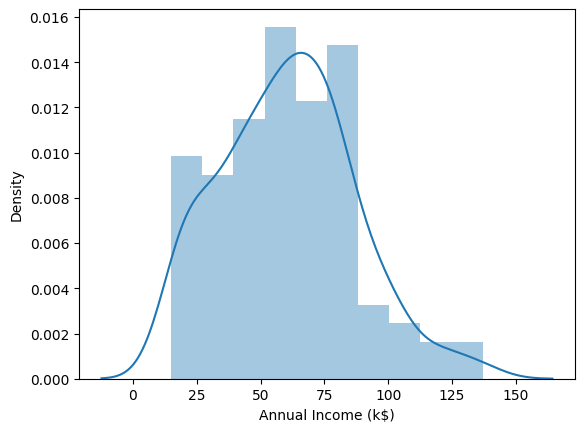

In [5]:
sns.distplot(df['Annual Income (k$)'])

In [6]:
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

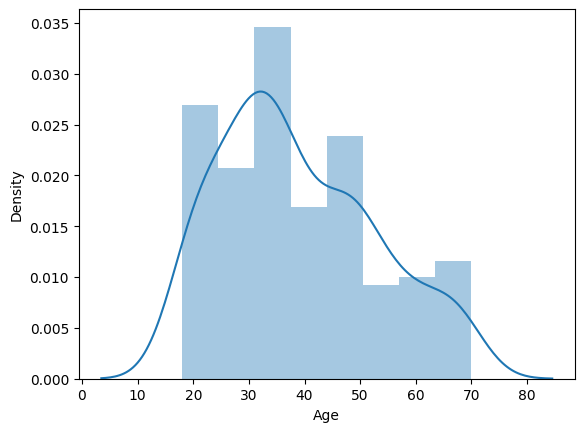

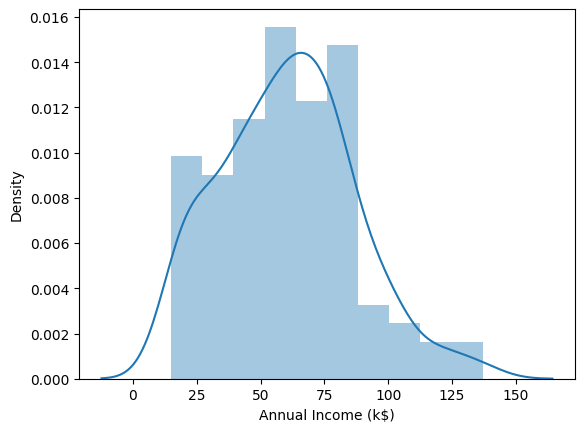

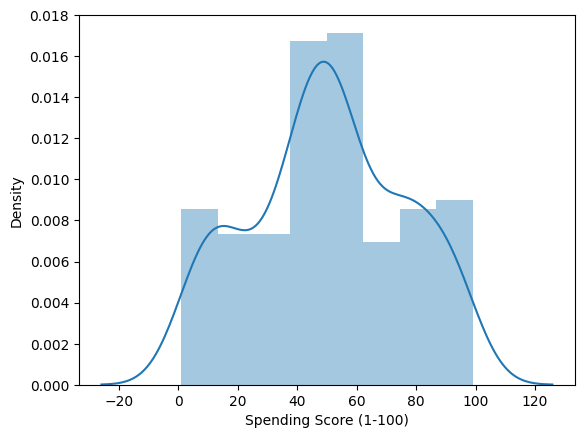

In [7]:
columns = ['Age', 'Annual Income (k$)', "Spending Score (1-100)"]

for i in columns:
    sns.distplot(df[i])
    plt.show()

<Axes: xlabel='Spending Score (1-100)', ylabel='Density'>

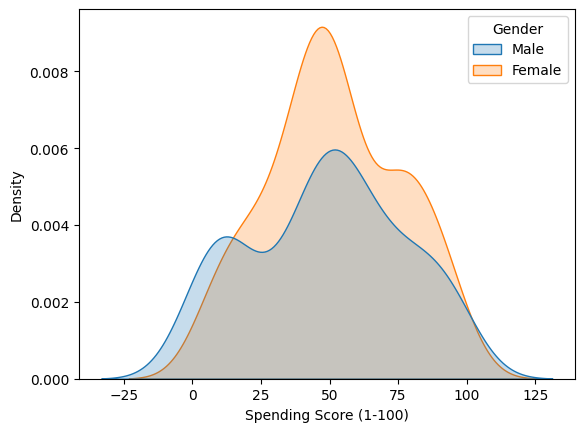

In [8]:
sns.kdeplot(data=df, x="Spending Score (1-100)", shade=True, hue="Gender")

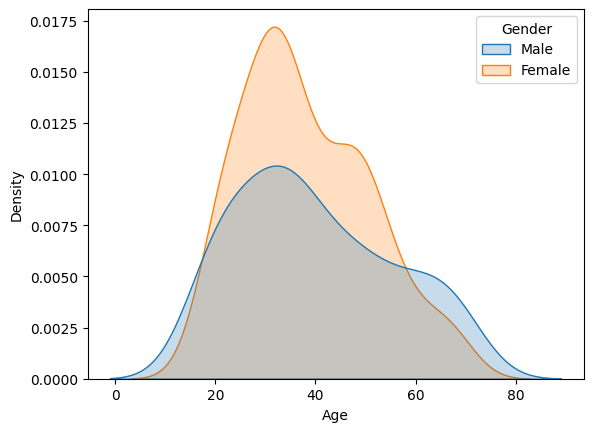

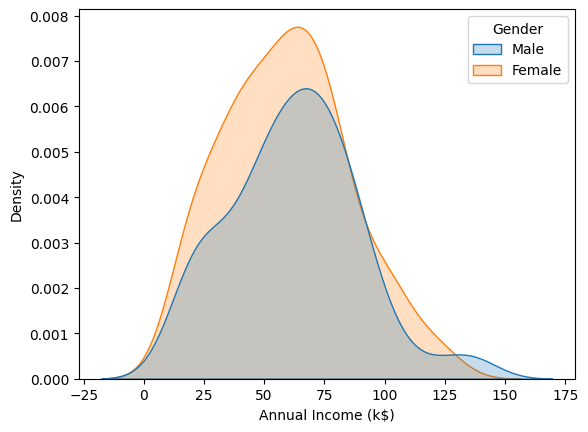

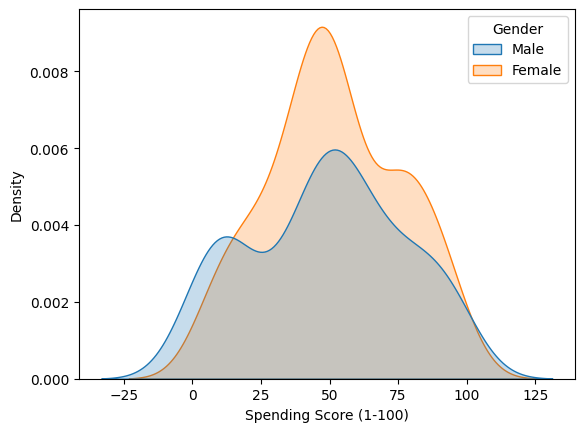

In [9]:
for i in columns:
    plt.figure()
    sns.kdeplot(data=df, x=i, shade=True, hue="Gender")

In [10]:
df['Gender'].value_counts(normalize=True)

Female    0.56
Male      0.44
Name: Gender, dtype: float64

### Bivariate Analysis

<Axes: xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

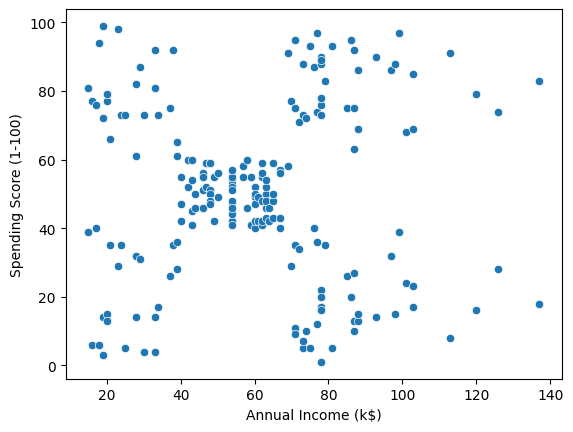

In [11]:
sns.scatterplot(data=df, x='Annual Income (k$)', y="Spending Score (1-100)")

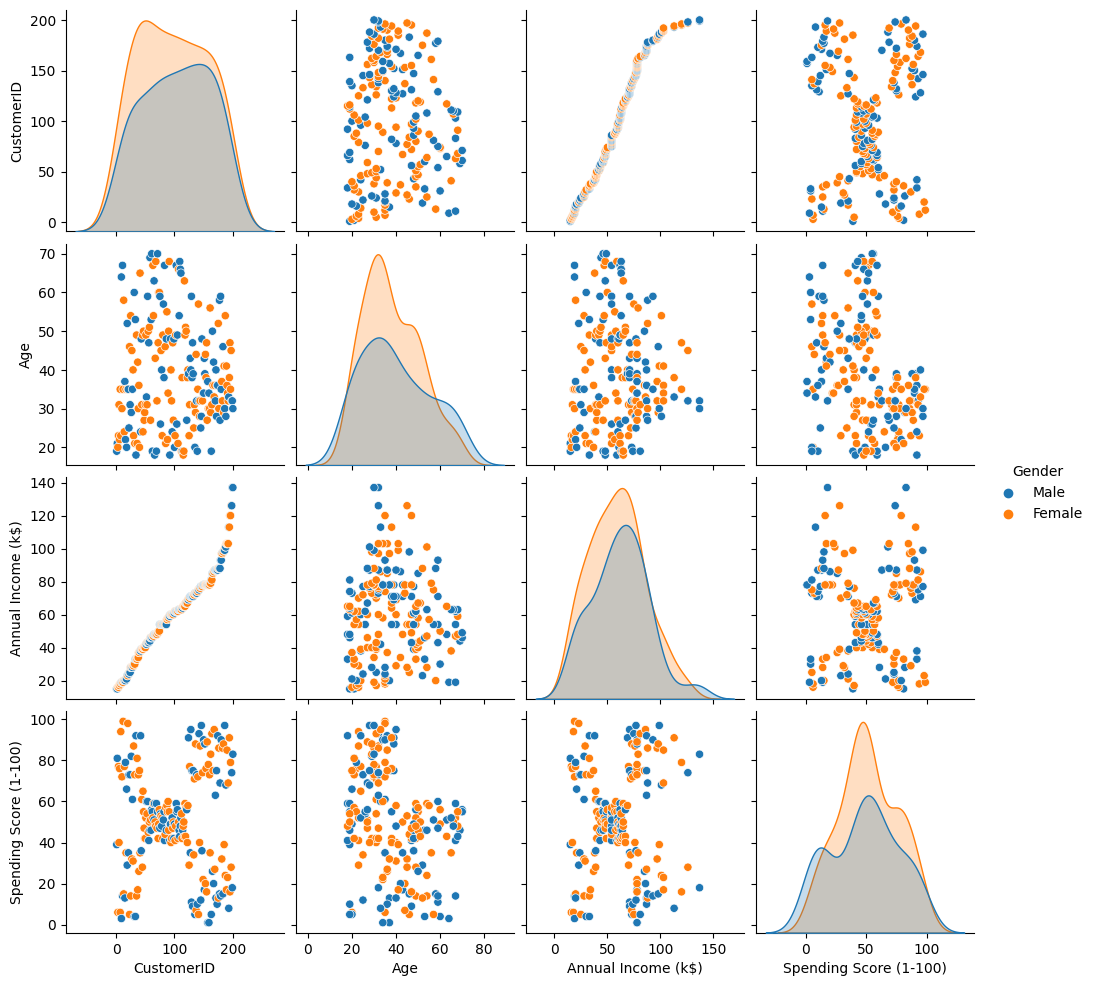

In [12]:
# df = df.drop("CustomerID", axis=1, inplace=True)
sns.pairplot(df, hue='Gender')

In [13]:
df.groupby(['Gender'])['Annual Income (k$)', "Spending Score (1-100)"].mean()

Annual Income (k$)  Spending Score (1-100)
Gender                                            
Female           59.250000               51.526786
Male             62.227273               48.511364

<Axes: >

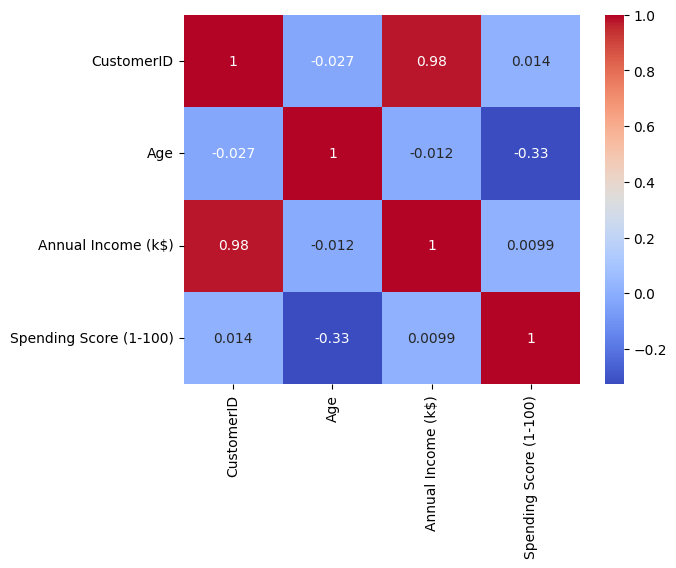

In [14]:
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')

### Clustering - Univariate, Bivariate, Multivariate

In [15]:
cluster = KMeans(n_clusters=4)
cluster.fit(df[['Annual Income (k$)']])

KMeans(n_clusters=4)

In [16]:
cluster.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

In [17]:
df['Income Cluster'] = cluster.labels_

In [18]:
df.head()

CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)  \
0           1    Male   19                  15                      39   
1           2    Male   21                  15                      81   
2           3  Female   20                  16                       6   
3           4  Female   23                  16                      77   
4           5  Female   31                  17                      40   

   Income Cluster  
0               1  
1               1  
2               1  
3               1  
4               1

In [19]:
df['Income Cluster'].value_counts()

3    68
0    62
1    50
2    20
Name: Income Cluster, dtype: int64

In [20]:
cluster.inertia_

13278.112713472487

In [21]:
inertia_score = []
for i in range(1,11):
    C = KMeans(n_clusters=i)
    C.fit(df[['Annual Income (k$)']])
    inertia_score.append(C.inertia_)

In [22]:
inertia_score

[137277.28000000003,
 48660.88888888889,
 23528.152173913055,
 13278.112713472487,
 8481.496190476191,
 5050.904761904763,
 3931.988095238096,
 2822.4996947496943,
 2189.256371406372,
 1734.1677489177487]

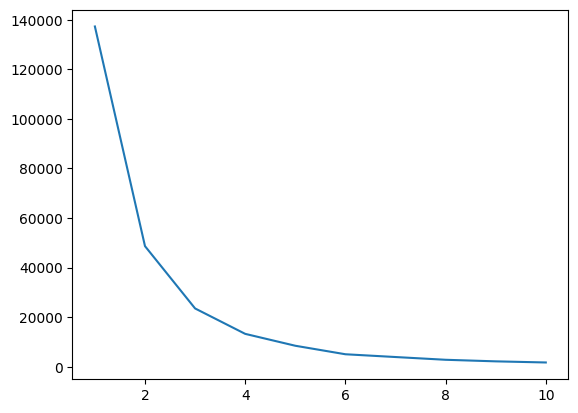

In [23]:
plt.plot(range(1,11), inertia_score)

In [24]:
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)', 'Income Cluster'],
      dtype='object')

In [25]:
df.groupby(df['Income Cluster'])['Annual Income (k$)',
       'Spending Score (1-100)'].mean()

Annual Income (k$)  Spending Score (1-100)
Income Cluster                                            
0                        77.806452               50.403226
1                        27.400000               49.480000
2                       109.700000               52.000000
3                        54.764706               50.014706

In [26]:
cluster2 = KMeans(n_clusters=5)
cluster2.fit(df[['Annual Income (k$)', 'Spending Score (1-100)']])
cluster2.labels_

array([3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 2,
       3, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 4, 0, 2, 0, 4, 0, 4, 0,
       2, 0, 4, 0, 4, 0, 4, 0, 4, 0, 2, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0,
       4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0,
       4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0,
       4, 0])

In [27]:
df['Spending income cluster'] = cluster2.labels_

In [28]:
df.head()

CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)  \
0           1    Male   19                  15                      39   
1           2    Male   21                  15                      81   
2           3  Female   20                  16                       6   
3           4  Female   23                  16                      77   
4           5  Female   31                  17                      40   

   Income Cluster  Spending income cluster  
0               1                        3  
1               1                        1  
2               1                        3  
3               1                        1  
4               1                        3

In [29]:
inertia_score = []
for i in range(1,11):
    C = KMeans(n_clusters=i)
    C.fit(df[['Annual Income (k$)', 'Spending Score (1-100)']])
    inertia_score.append(C.inertia_)

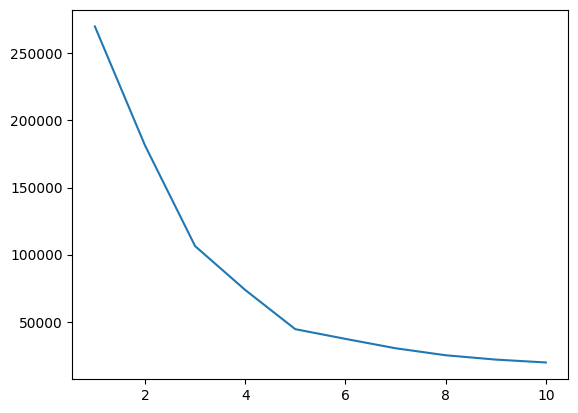

In [30]:
plt.plot(range(1,11), inertia_score)

In [31]:
center = pd.DataFrame(cluster2.cluster_centers_)
center.columns = ['x', 'y']

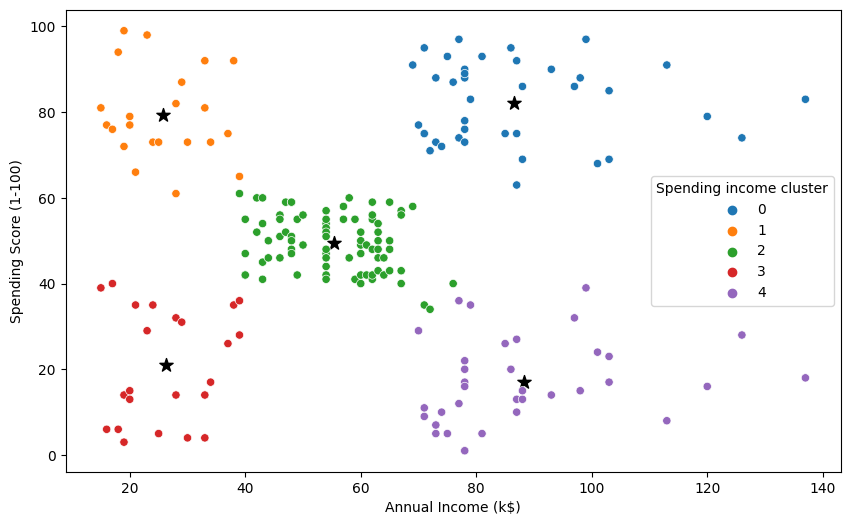

In [32]:
plt.figure(figsize=(10,6))
plt.scatter(x=center['x'], y=center['y'], s=100,c='black', marker='*')
sns.scatterplot(data=df, x='Annual Income (k$)', y='Spending Score (1-100)', hue='Spending income cluster', palette='tab10')
plt.savefig("clustering_bivariate.png")

In [33]:
pd.crosstab(df['Spending income cluster'], df['Gender'], normalize='index')

Gender                     Female      Male
Spending income cluster                    
0                        0.538462  0.461538
1                        0.590909  0.409091
2                        0.592593  0.407407
3                        0.608696  0.391304
4                        0.457143  0.542857

In [34]:
df.groupby(df['Spending income cluster'])['Age','Annual Income (k$)',
       'Spending Score (1-100)'].mean()

Age  Annual Income (k$)  Spending Score (1-100)
Spending income cluster                                                       
0                        32.692308           86.538462               82.128205
1                        25.272727           25.727273               79.363636
2                        42.716049           55.296296               49.518519
3                        45.217391           26.304348               20.913043
4                        41.114286           88.200000               17.114286

In [35]:
# Multivariate clustering
from sklearn.preprocessing import StandardScaler, LabelEncoder
std = StandardScaler()
le = LabelEncoder()

In [36]:
df['Gender'] = le.fit_transform(df['Gender'])

In [37]:
df.head(3)

CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)  \
0           1       1   19                  15                      39   
1           2       1   21                  15                      81   
2           3       0   20                  16                       6   

   Income Cluster  Spending income cluster  
0               1                        3  
1               1                        1  
2               1                        3

In [38]:
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)', 'Income Cluster', 'Spending income cluster'],
      dtype='object')

In [39]:
df = df[['Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)']]

In [40]:
dff = std.fit_transform(df)

In [41]:
df = pd.DataFrame(std.fit_transform(dff))
df.head()

0         1         2         3
0  1.128152 -1.424569 -1.738999 -0.434801
1  1.128152 -1.281035 -1.738999  1.195704
2 -0.886405 -1.352802 -1.700830 -1.715913
3 -0.886405 -1.137502 -1.700830  1.040418
4 -0.886405 -0.563369 -1.662660 -0.395980

In [42]:
inertia_score3 = []
for i in range(1,11):
    C = KMeans(n_clusters=i)
    C.fit(df)
    inertia_score3.append(C.inertia_)

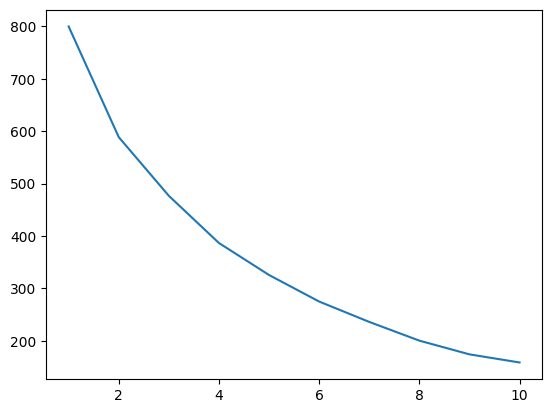

In [43]:
plt.plot(range(1,11), inertia_score3)